In [1]:
 pip install citipy

Note: you may need to restart the kernel to use updated packages.


# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
city_data = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=Imperial&q="


city_name = []
lats = []
lngs = []
temp = []
wind_speeds = []
humidity = []
cloudiness = []
country = []
date = []
#set count holders to make the sets
counts = 0
sets = 1


for city in cities:
    try:
        w_data = requests.get(query_url + city.replace(" ", "&")).json()
        lats.append(w_data["coord"]["lat"])
        lngs.append(w_data["coord"]["lon"])
        temp.append(w_data["main"]["temp_max"])
        wind_speeds.append(w_data["wind"]["speed"])
        humidity.append(w_data["main"]["humidity"])
        cloudiness.append(w_data["clouds"]["all"])
        country.append(w_data["sys"]["country"])
        date.append(w_data["dt"])
#Setup the counts and sets to  mange cities        
        if counts > 49:
            counts = 0
            sets += 1
            city_name.append(city)
                 
        else:
            counts += 1
            city_name.append(city)
            
        print(f"Proccessing Record {counts} of set {sets} | {city}")
              
    except KeyError:
        print("City not found. Skipping...")
            
print("-------------------------------------")
print("Data Retrieval is Complete")
print("-------------------------------------")














Proccessing Record 1 of set 1 | tasiilaq
Proccessing Record 2 of set 1 | jalu
City not found. Skipping...
Proccessing Record 3 of set 1 | cabo san lucas
Proccessing Record 4 of set 1 | ancud
Proccessing Record 5 of set 1 | southbridge
Proccessing Record 6 of set 1 | mar del plata
Proccessing Record 7 of set 1 | conde
Proccessing Record 8 of set 1 | talaya
Proccessing Record 9 of set 1 | nikolskoye
Proccessing Record 10 of set 1 | muros
Proccessing Record 11 of set 1 | vostok
Proccessing Record 12 of set 1 | jamestown
Proccessing Record 13 of set 1 | avarua
Proccessing Record 14 of set 1 | bathsheba
Proccessing Record 15 of set 1 | thompson
Proccessing Record 16 of set 1 | gushikawa
Proccessing Record 17 of set 1 | narsaq
Proccessing Record 18 of set 1 | cherskiy
Proccessing Record 19 of set 1 | new norfolk
Proccessing Record 20 of set 1 | mabaruma
Proccessing Record 21 of set 1 | rikitea
Proccessing Record 22 of set 1 | puerto ayacucho
Proccessing Record 23 of set 1 | trinidad
Proccess

Proccessing Record 27 of set 4 | cabedelo
City not found. Skipping...
City not found. Skipping...
Proccessing Record 28 of set 4 | biak
Proccessing Record 29 of set 4 | polunochnoye
Proccessing Record 30 of set 4 | lavrentiya
Proccessing Record 31 of set 4 | celendin
Proccessing Record 32 of set 4 | kohima
Proccessing Record 33 of set 4 | pyshchug
Proccessing Record 34 of set 4 | torbay
Proccessing Record 35 of set 4 | boddam
Proccessing Record 36 of set 4 | margate
Proccessing Record 37 of set 4 | san luis
Proccessing Record 38 of set 4 | ilulissat
Proccessing Record 39 of set 4 | escarcega
Proccessing Record 40 of set 4 | port elizabeth
Proccessing Record 41 of set 4 | shache
Proccessing Record 42 of set 4 | gasa
Proccessing Record 43 of set 4 | nara
Proccessing Record 44 of set 4 | haines junction
Proccessing Record 45 of set 4 | fresnillo
City not found. Skipping...
Proccessing Record 46 of set 4 | hasaki
City not found. Skipping...
Proccessing Record 47 of set 4 | calamar
Proccess

Proccessing Record 5 of set 8 | guerrero negro
Proccessing Record 6 of set 8 | merauke
Proccessing Record 7 of set 8 | ostrovnoy
Proccessing Record 8 of set 8 | datong
City not found. Skipping...
City not found. Skipping...
Proccessing Record 9 of set 8 | san carlos de bariloche
Proccessing Record 10 of set 8 | stepnyak
Proccessing Record 11 of set 8 | revda
Proccessing Record 12 of set 8 | nhulunbuy
Proccessing Record 13 of set 8 | massakory
Proccessing Record 14 of set 8 | ballangen
Proccessing Record 15 of set 8 | narok
Proccessing Record 16 of set 8 | lagoa
City not found. Skipping...
Proccessing Record 17 of set 8 | chernyshevskiy
Proccessing Record 18 of set 8 | manaus
Proccessing Record 19 of set 8 | iqaluit
Proccessing Record 20 of set 8 | tuy hoa
City not found. Skipping...
Proccessing Record 21 of set 8 | awjilah
Proccessing Record 22 of set 8 | parana
Proccessing Record 23 of set 8 | jumla
Proccessing Record 24 of set 8 | pucara
Proccessing Record 25 of set 8 | teya
Proccess

Proccessing Record 31 of set 11 | ust-tsilma
Proccessing Record 32 of set 11 | matay
Proccessing Record 33 of set 11 | demyansk
Proccessing Record 34 of set 11 | esna
Proccessing Record 35 of set 11 | kizner
Proccessing Record 36 of set 11 | mbini
Proccessing Record 37 of set 11 | obera
Proccessing Record 38 of set 11 | bairnsdale
-------------------------------------
Data Retrieval is Complete
-------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_list = {"City":city_name, "Lat":lats, "Lng":lngs, "Max Temp":temp, 
                "Humidity":humidity, "Cloudiness":cloudiness, "Wind Speed":wind_speeds, "Country":country, "Date":date}
weather_df = pd.DataFrame(weather_list)

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.6145,-37.6368,23.0,80,90,2.71,GL,1618713479
1,jalu,29.0331,21.5482,77.2,24,16,9.35,LY,1618713479
2,cabo san lucas,-8.2833,-35.0333,73.4,94,75,2.30,BR,1618713480
3,ancud,-41.8697,-73.8203,53.6,87,20,9.22,CL,1618713480
4,southbridge,42.0751,-72.0334,42.8,70,90,8.05,US,1618713314


In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,22.916813,23.494470,59.837482,66.740876,55.386861,7.652117,1.618714e+09
std,31.232318,86.459087,21.060241,23.204252,38.584506,5.331632,6.986603e+01
min,-54.800000,-179.166700,-10.050000,7.000000,0.000000,0.360000,1.618713e+09
25%,-2.899975,-48.115450,43.000000,53.000000,20.000000,3.440000,1.618714e+09
50%,25.274900,25.099050,62.590000,72.000000,69.500000,6.500000,1.618714e+09
75%,49.370825,100.490900,78.235000,85.000000,95.000000,10.360000,1.618714e+09
max,78.218600,179.316700,93.290000,100.000000,100.000000,34.050000,1.618714e+09


In [10]:
weather_df.to_csv(city_data)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
maxhumid =weather_df[weather_df["Humidity"] == 100]

print(maxhumid)

          City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
6        conde  -7.2597  -34.9075     73.40       100           0        5.75   
145     nemuro  43.3236  145.5750     42.80       100          75       16.11   
179   cabedelo  -6.9811  -34.8339     73.40       100           0        5.75   
186     torbay  47.6666  -52.7314     35.01       100          90       17.27   
288    fortuna  40.5982 -124.1573     53.01       100           1        9.22   
316  kolobrzeg  54.1757   15.5834     39.99       100          66        9.22   
326   akureyri  65.6835  -18.0878     35.60       100          90        6.91   
545      mbini   1.5740    9.6134     77.00       100          40        4.65   

    Country        Date  
6        BR  1618713481  
145      JP  1618713522  
179      BR  1618713531  
186      CA  1618713333  
288      US  1618713563  
316      PL  1618713570  
326      IS  1618713573  
545      GQ  1618713636  


In [12]:
new_weather_df = weather_df.drop([74,78,128,215,358,391,421,437,516])
new_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02
mean,22.887269,22.782512,59.850965,66.808905,55.070501,7.651484,1.618714e+09
std,31.304567,86.654386,20.957203,23.179649,38.522897,5.325092,7.014405e+01
min,-54.800000,-179.166700,-10.050000,7.000000,0.000000,0.430000,1.618713e+09
25%,-2.958350,-50.108750,43.000000,53.000000,20.000000,3.440000,1.618714e+09
50%,25.286700,24.433600,62.580000,72.000000,68.000000,6.490000,1.618714e+09
75%,49.508350,100.037950,78.110000,85.000000,95.000000,10.315000,1.618714e+09
max,78.218600,179.316700,93.290000,100.000000,100.000000,34.050000,1.618714e+09


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
new_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.6145,-37.6368,23.0,80,90,2.71,GL,1618713479
1,jalu,29.0331,21.5482,77.2,24,16,9.35,LY,1618713479
2,cabo san lucas,-8.2833,-35.0333,73.4,94,75,2.30,BR,1618713480
3,ancud,-41.8697,-73.8203,53.6,87,20,9.22,CL,1618713480
4,southbridge,42.0751,-72.0334,42.8,70,90,8.05,US,1618713314


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

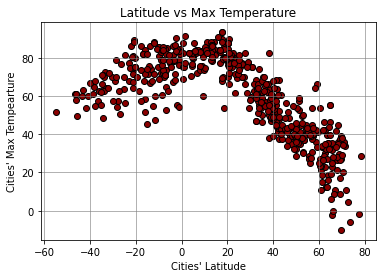

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(new_weather_df["Lat"], new_weather_df["Max Temp"], edgecolors = "black", facecolors = "darkred")
plt.title("Latitude vs Max Temperature")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Max Tempearture")
plt.grid(b=True,axis = "both", color = "grey", alpha = float(".75"))




plt.show()

plt.savefig("../output_data/fig1.png")

## Latitude vs. Humidity Plot

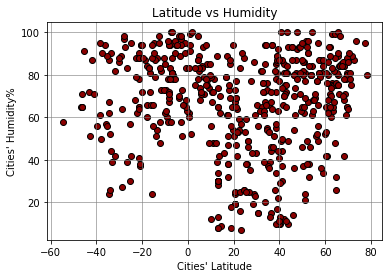

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(new_weather_df["Lat"], new_weather_df["Humidity"], edgecolors = "black", facecolors = "darkred")
plt.title("Latitude vs Humidity")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Humidity%")
plt.grid(b=True,axis = "both", color = "grey", alpha = float(".75"))




plt.show()

plt.savefig("../output_data/fig2.png")

## Latitude vs. Cloudiness Plot

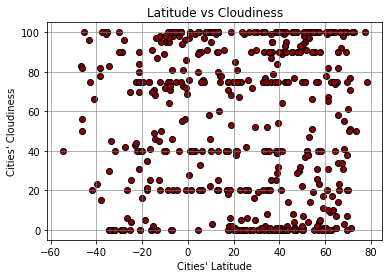

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(new_weather_df["Lat"], new_weather_df["Cloudiness"], edgecolors = "black", facecolors = "darkred")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Cloudiness")
plt.grid(b=True,axis = "both", color = "grey", alpha = float(".75"))




plt.show()

plt.savefig("../output_data/fig3.png")

## Latitude vs. Wind Speed Plot

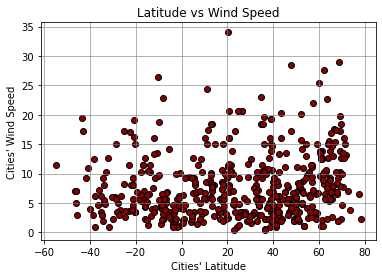

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(new_weather_df["Lat"], new_weather_df["Wind Speed"], edgecolors = "black", facecolors = "darkred")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Wind Speed")
plt.grid(b=True,axis = "both", color = "grey", alpha = float(".75"))




plt.show()

plt.savefig("../output_data/fig4.png")

## Linear Regression

In [20]:
lat_reg = new_weather_df.iloc[:,1]
lat_slope, lat_int, lat_r, lat_p, lat_std_err = linregress(lat_reg)




IndexError: tuple index out of range

In [24]:
north = new_weather_df.loc[new_weather_df["Lat"] >= 0.0]
north.reset_index(inplace=True)
south = new_weather_df.loc[new_weather_df["Lat"] < 0.0]
south.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

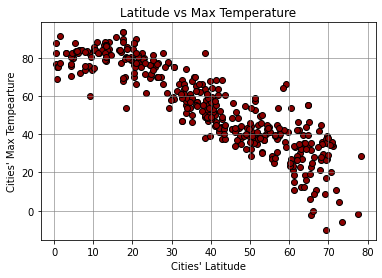

In [25]:
plt.scatter(north["Lat"], north["Max Temp"], edgecolors = "black", facecolors = "darkred")
plt.title("Latitude vs Max Temperature")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Max Tempearture")
plt.grid(b=True,axis = "both", color = "grey", alpha = float(".75"))




plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

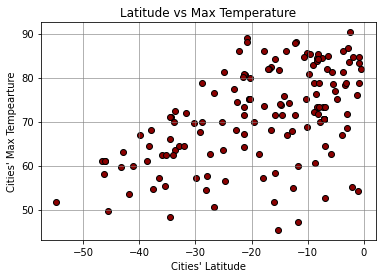

In [27]:
plt.scatter(south["Lat"], south["Max Temp"], edgecolors = "black", facecolors = "darkred")
plt.title("Latitude vs Max Temperature")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Max Tempearture")
plt.grid(b=True,axis = "both", color = "grey", alpha = float(".75"))




plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

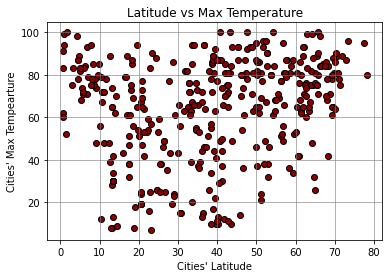

In [28]:
plt.scatter(north["Lat"], north["Humidity"], edgecolors = "black", facecolors = "darkred")
plt.title("Latitude vs Max Temperature")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Max Tempearture")
plt.grid(b=True,axis = "both", color = "grey", alpha = float(".75"))




plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

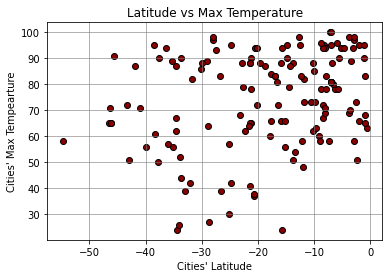

In [29]:
plt.scatter(south["Lat"], south["Humidity"], edgecolors = "black", facecolors = "darkred")
plt.title("Latitude vs Max Temperature")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Max Tempearture")
plt.grid(b=True,axis = "both", color = "grey", alpha = float(".75"))




plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

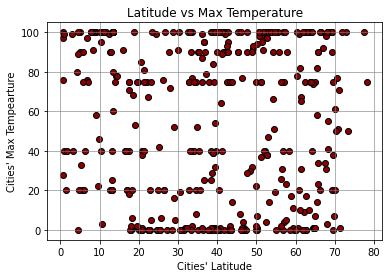

In [30]:
plt.scatter(north["Lat"], north["Cloudiness"], edgecolors = "black", facecolors = "darkred")
plt.title("Latitude vs Max Temperature")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Max Tempearture")
plt.grid(b=True,axis = "both", color = "grey", alpha = float(".75"))




plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

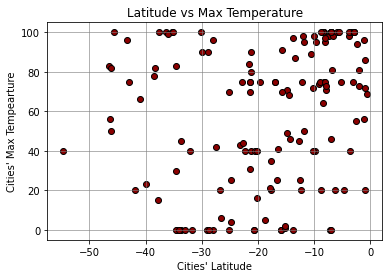

In [31]:
plt.scatter(south["Lat"], south["Cloudiness"], edgecolors = "black", facecolors = "darkred")
plt.title("Latitude vs Max Temperature")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Max Tempearture")
plt.grid(b=True,axis = "both", color = "grey", alpha = float(".75"))




plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

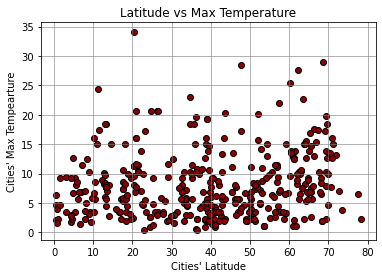

In [32]:
plt.scatter(north["Lat"], north["Wind Speed"], edgecolors = "black", facecolors = "darkred")
plt.title("Latitude vs Max Temperature")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Max Tempearture")
plt.grid(b=True,axis = "both", color = "grey", alpha = float(".75"))




plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

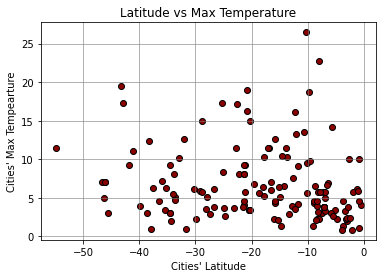

In [33]:
plt.scatter(south["Lat"], south["Wind Speed"], edgecolors = "black", facecolors = "darkred")
plt.title("Latitude vs Max Temperature")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Max Tempearture")
plt.grid(b=True,axis = "both", color = "grey", alpha = float(".75"))




plt.show()